In [2]:
### Part_3 - Hypothesis_Testing_for_Ghazini_district

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import pandasql as ps
import sqlite3
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro

In [3]:
data = pd.read_excel (r'ged201.xlsx')
tmn = pd.read_csv (r'tmn_Ghazini.csv')
tmx = pd.read_csv (r'tmx_Ghazini.csv')
temp = pd.read_csv (r'tmp_Ghazini.csv')
prec = pd.read_csv (r'prec_Ghazini.csv')

In [4]:
ghazini = data[(data.adm_2 == 'Ghazini district') ]

In [5]:
tmn.columns.values[0] = 'Date1'
tmx.columns.values[0] = 'Date2'
temp.columns.values[0] = 'Date3'
prec.columns.values[0] = 'Date4'

In [6]:
tmn['Date1'] = pd.to_datetime(tmn['Date1'])
tmx['Date2'] = pd.to_datetime(tmx['Date2'])
temp['Date3'] = pd.to_datetime(temp['Date3'])
prec['Date4'] = pd.to_datetime(prec['Date4'])

In [7]:
##Merging Kabul dataset with climate dataset on 'Date' variable 
ghazini_min = pd.merge(ghazini,tmn, left_on=ghazini['date_start'].apply(lambda x: (x.year, x.month)),
         right_on=tmn['Date1'].apply(lambda y: (y.year, y.month)),
         how='inner')

ghazini_max = pd.merge(ghazini,tmx, left_on=ghazini['date_start'].apply(lambda x: (x.year, x.month)),
         right_on=tmx['Date2'].apply(lambda y: (y.year, y.month)),
         how='inner')

ghazini_temp = pd.merge(ghazini,temp, left_on=ghazini['date_start'].apply(lambda x: (x.year, x.month)),
         right_on=temp['Date3'].apply(lambda y: (y.year, y.month)),
         how='inner')

ghazini_prec = pd.merge(ghazini,prec, left_on=ghazini['date_start'].apply(lambda x: (x.year, x.month)),
         right_on=prec['Date4'].apply(lambda y: (y.year, y.month)),
         how='inner')


In [11]:
ghazini_min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key_0              0 non-null      object        
 1   id                 0 non-null      int64         
 2   relid              0 non-null      object        
 3   year               0 non-null      int64         
 4   active_year        0 non-null      int64         
 5   code_status        0 non-null      object        
 6   type_of_violence   0 non-null      int64         
 7   conflict_dset_id   0 non-null      int64         
 8   conflict_new_id    0 non-null      int64         
 9   conflict_name      0 non-null      object        
 10  dyad_dset_id       0 non-null      int64         
 11  dyad_new_id        0 non-null      int64         
 12  dyad_name          0 non-null      object        
 13  side_a_dset_id     0 non-null      int64         
 14  side_a_new_id      0 non-nu

In [9]:
# normality test for the Total Deaths
stat, p = shapiro(ghazini['best'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

ValueError: Data must be at least length 3.

In [12]:
# normality test for Minimum temperature
stat, p = shapiro(ghazini_min['Min_temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

ValueError: Data must be at least length 3.

In [97]:
# normality test for Maximum temperature
stat, p = shapiro(kabul_max['Max_temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.914, p=0.000
Sample does not look Gaussian (reject H0)


In [98]:
# normality test for Average temperature
stat, p = shapiro(kabul_temp['Average_temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.916, p=0.000
Sample does not look Gaussian (reject H0)


In [99]:
# normality test for Precipitation
stat, p = shapiro(kabul_prec['Precipitation'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.873, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
### Null hypothesis: There is relationship between Conflict(Total deaths) and maximum temperature variable. ρ = 0.
### Alternative hypothesis: There is no relationship between Conflict and maximum temperature variable. ρ ≠ 0.

Note:
Here we see that correlation value is pretty low around -0.009(Pearson) and 0.031(Spearman), which clearly shows 
that there is no correlation between the conflicts and temperature changes, 

Also for our final analysis we consider the Spearman value since both the variables do not follow normal distribution

However, the p-value>0.05 which is pretty high than significance level hence we accept the atlernate hypothesis 
## that there exists NO relationship between Conflict and temperature variables

##### Pearson Result(-0.009303611762149038, 0.7255685749974407) - There is no linear relationship

##### Spearman Result(correlation=0.031996451378918045, pvalue=0.227234687007613) - There is no other relationship

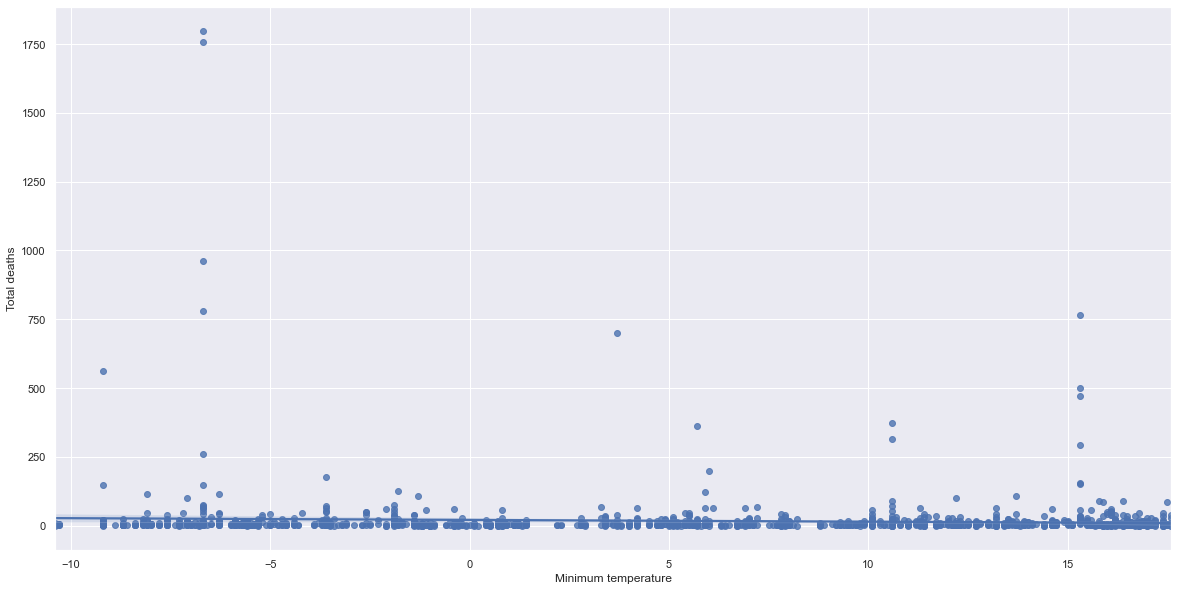

Assoc. - best and tmax
(-0.06159762700753278, 0.020049123035527076)
Assoc. - best and tmax
SpearmanrResult(correlation=-0.015404451449864812, pvalue=0.5612205950412297)


In [116]:
## Correlation between Minimum temperature and Best
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = sns.regplot( x=ghazini_min.Min_temp, y=ghazini_min.best, fit_reg=True, data=ghazini_min)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('Min_temp','best', ghazini_min, 'Minimum temperature', 'Total deaths')

print('Assoc. - best and tmax')
print(pearsonr(ghazini_min['best'], ghazini_min['Min_temp']))

print('Assoc. - best and tmax')
print(spearmanr(ghazini_min['best'], ghazini_min['Min_temp']))



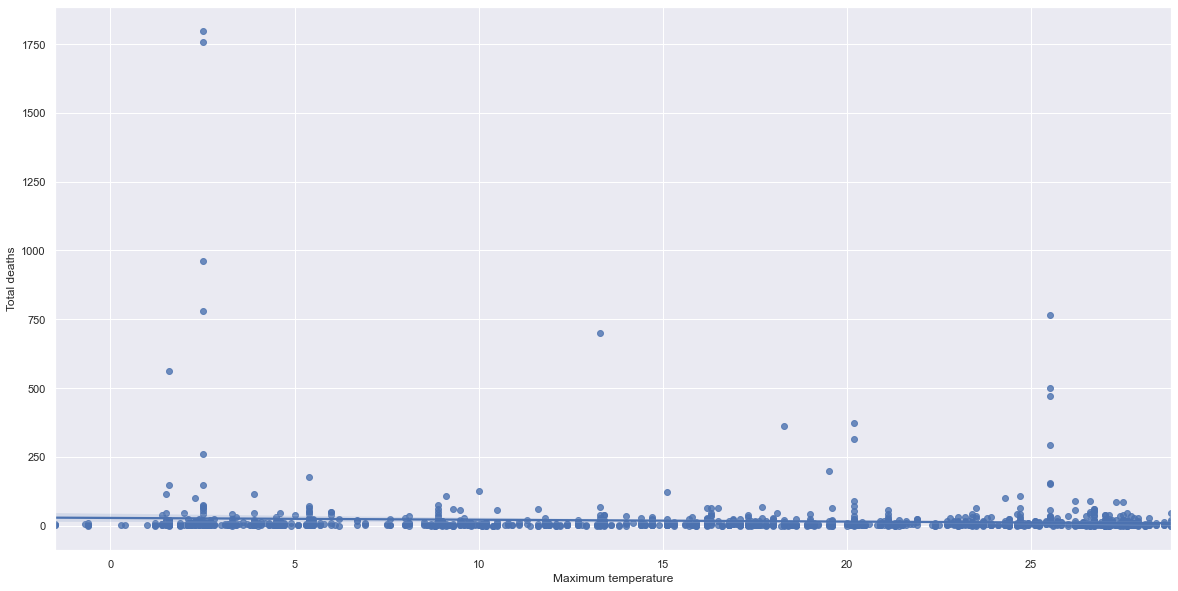

Assoc. - best and tmax
(-0.06815863250201828, 0.010062696173389458)
Assoc. - best and tmax
SpearmanrResult(correlation=-0.013777801878955968, pvalue=0.6032943895516937)


In [121]:
## Correlation between Maximum temperature and Best
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = sns.regplot( x=ghazini_max.Max_temp, y=ghazini_max.best, fit_reg=True, data=ghazini_max)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('Max_temp','best', ghazini_max, 'Maximum temperature', 'Total deaths')

print('Assoc. - best and tmax')
print(pearsonr(ghazini_max['best'], ghazini_max['Max_temp']))

print('Assoc. - best and tmax')
print(spearmanr(ghazini_max['best'], ghazini_max['Max_temp']))


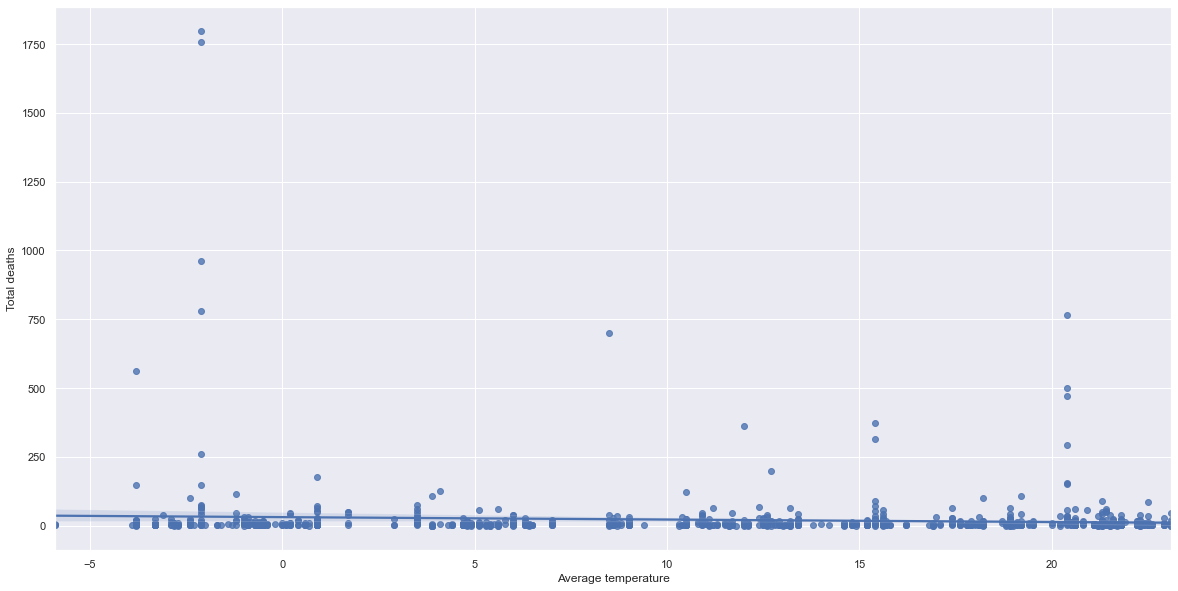

Assoc. - best and tmax
(-0.07505640686408693, 0.01806251817730678)
Assoc. - best and tmax
SpearmanrResult(correlation=-0.013302877305654876, pvalue=0.6755975992389096)


In [120]:
## Correlation between Average temperature and Best
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = sns.regplot( x=ghazini_temp.Average_temp, y=ghazini_temp.best, fit_reg=True, data=ghazini_temp)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('Average_temp','best', ghazini_temp, 'Average temperature', 'Total deaths')

print('Assoc. - best and tmax')
print(pearsonr(ghazini_temp['best'], ghazini_temp['Average_temp']))

print('Assoc. - best and tmax')
print(spearmanr(ghazini_temp['best'], ghazini_temp['Average_temp']))


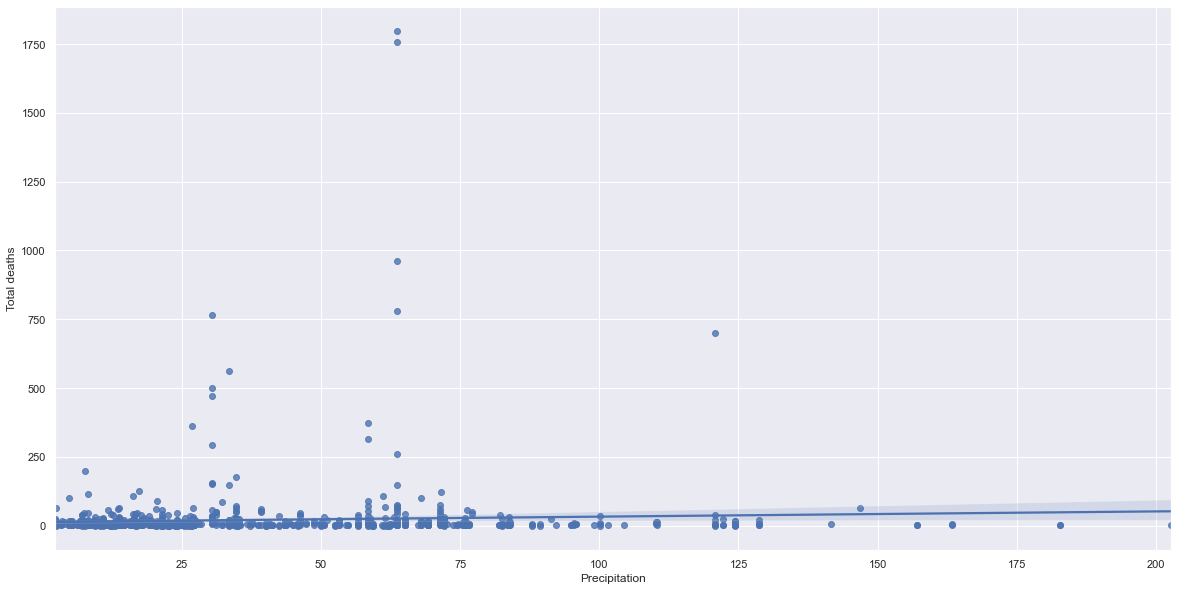

Assoc. - best and tmax
(0.057048290767131415, 0.07249576981591356)
Assoc. - best and tmax
SpearmanrResult(correlation=0.03726804844246927, pvalue=0.24090686785248253)


In [119]:
## Correlation between Precipitation and Best
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = sns.regplot( x=ghazini_prec.Precipitation, y=ghazini_prec.best, fit_reg=True, data=ghazini_prec)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('Precipitation','best', ghazini_prec, 'Precipitation', 'Total deaths')

print('Assoc. - best and tmax')
print(pearsonr(ghazini_prec['best'], ghazini_prec['Precipitation']))

print('Assoc. - best and tmax')
print(spearmanr(ghazini_prec['best'], ghazini_prec['Precipitation']))


In [103]:
ghazini_min1 = ghazini_min.set_index('Date1')
ghazini_max1 = ghazini_max.set_index('date_start')
ghazini_temp1 = ghazini_temp.set_index('date_start')
ghazini_prec1 = ghazini_prec.set_index('date_start')

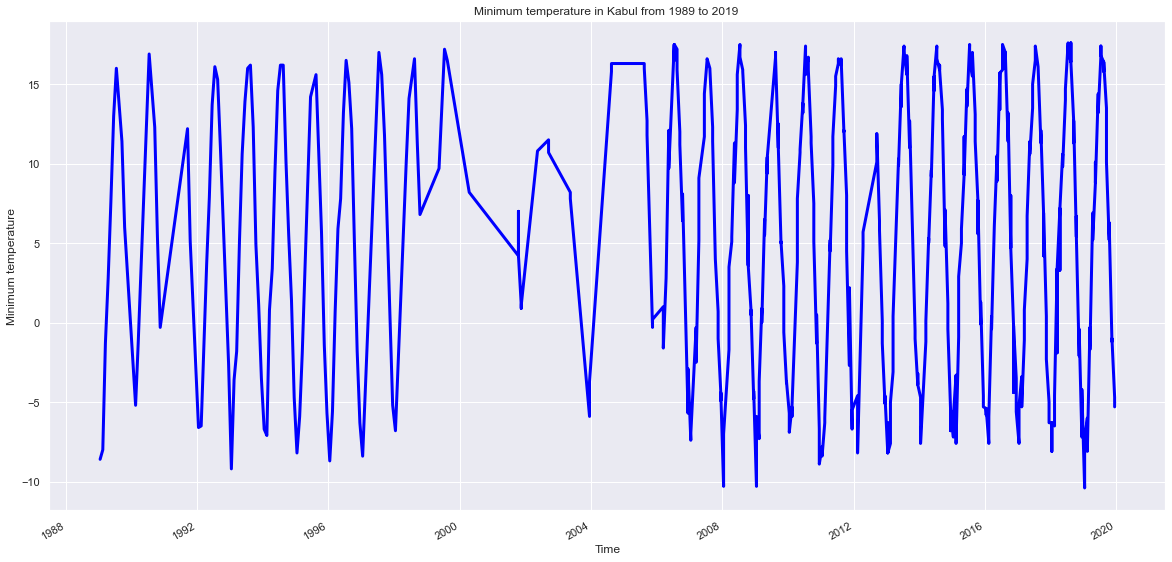

In [115]:
sns.set(rc={'figure.figsize':(20, 10)})
ghazini_min1['Min_temp'].plot(linewidth=3, title = 'Minimum temperature in Ghazini from 1989 to 2019 ', color='blue')
plt.ylabel('Minimum temperature')
plt.xlabel('Time')
plt.show()

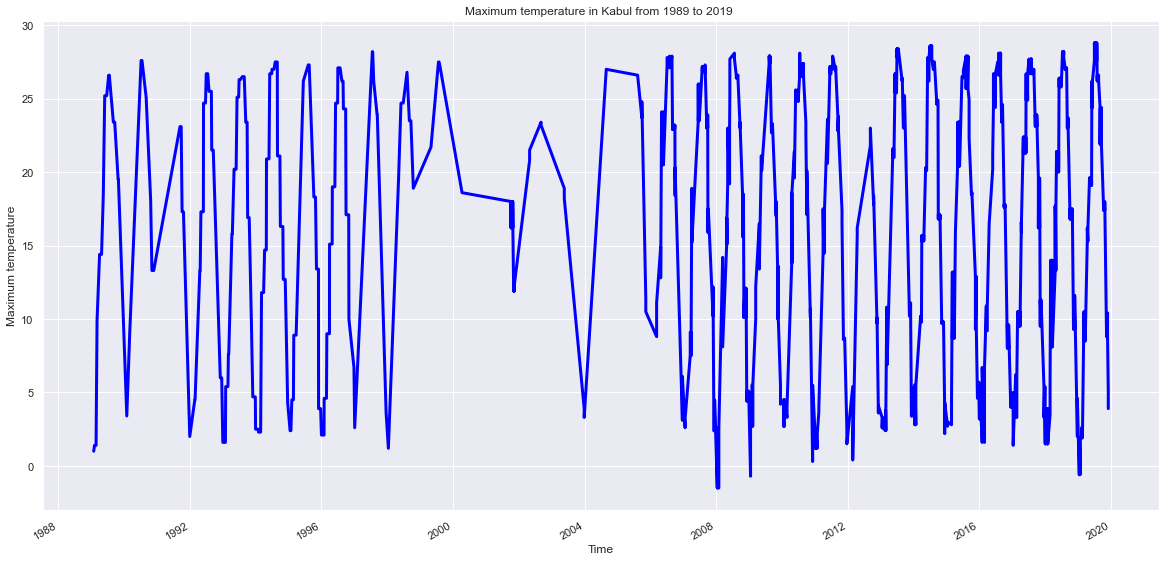

In [122]:
sns.set(rc={'figure.figsize':(20, 10)})
ghazini_max1['Max_temp'].plot(linewidth=3, title = 'Maximum temperature in Ghazini from 1989 to 2019 ', color='blue')
plt.ylabel('Maximum temperature')
plt.xlabel('Time')
plt.show()

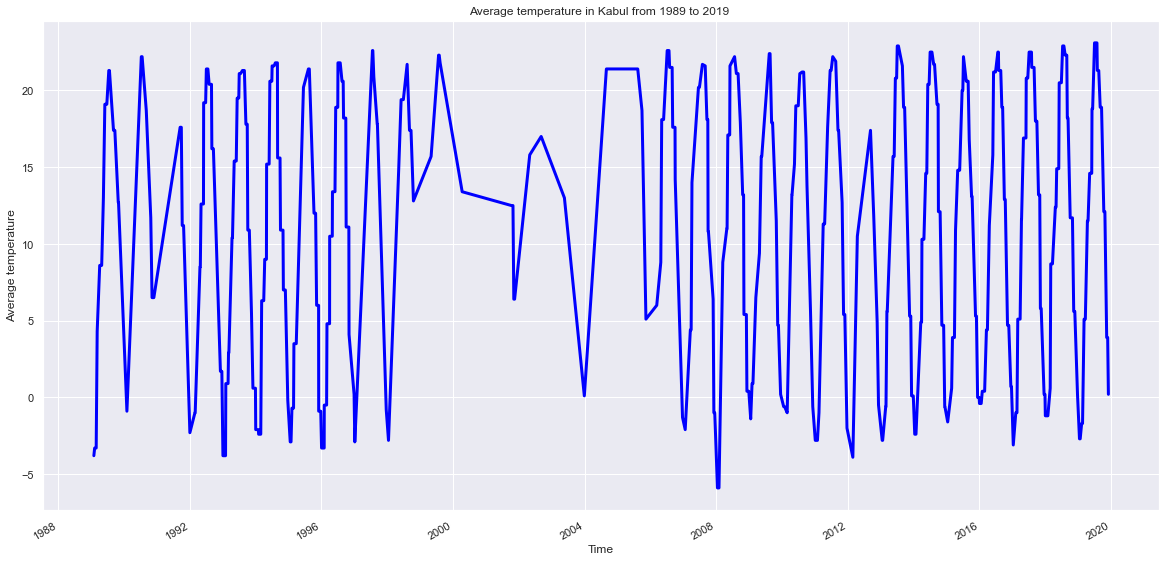

In [111]:
sns.set(rc={'figure.figsize':(20, 10)})
ghazini_temp1['Average_temp'].plot(linewidth=3, title = 'Average temperature in Ghazini from 1989 to 2019 ', color='blue')
plt.ylabel('Average temperature')
plt.xlabel('Time')
plt.show()

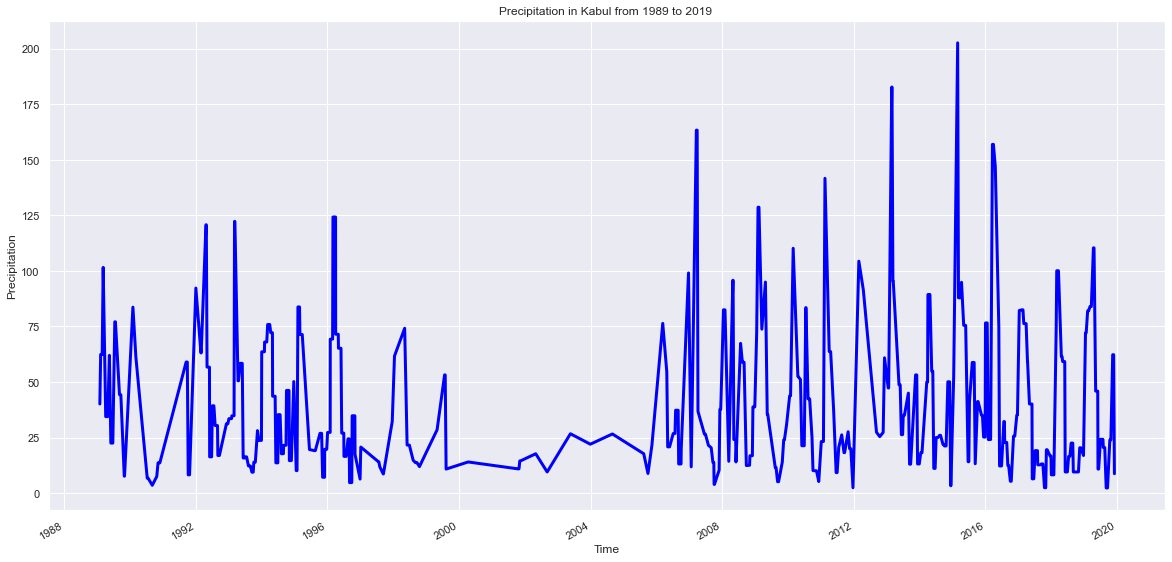

In [123]:
sns.set(rc={'figure.figsize':(20, 10)})
ghazini_prec1['Precipitation'].plot(linewidth=3, title = 'Precipitation in Ghazini from 1989 to 2019 ', color='blue')
plt.ylabel('Precipitation')
plt.xlabel('Time')
plt.show()